In [1]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf
import pickle
import os


In [2]:
#calculates the probability of detection given the parameter value (mu) and uncertainty (sigma)
#assumes PDF is gaussian normally distributed
def detect_prob(mu, sigma, doprint=0): 

    Pd = 1-0.5*(1+erf((-1*mu)/(sigma*np.sqrt(2))))  #detection probability, modified from CDF function

    Pd_pcnt_str=str(np.around(Pd*100,decimals=1))+'% positive probability' #string output version

    if doprint > 0:
        print(Pd_pcnt_str)

    return Pd, Pd_pcnt_str

In [3]:
def read_data(filetag):

    #make directories and set figure output names
    figurepath='figures/'+filetag
    try: 
        os.mkdir(figurepath)
        print(figurepath)
    except OSError as error: 
        print(error)  

    fig_outname=figurepath+'/'+filetag+'_gyre'

    # read pickle files as dataframes
    outname='data/'+filetag
    df_name=outname+'_df.pkl'
    fdfe_name=outname+'_fdfe.pkl'
    vars_name=outname+'_vars.pkl'

    f = open(vars_name, 'rb')
    waveln,meas,rel_err,sys_err,jac_all = pickle.load(f)
    f.close()

    df = pd.read_pickle(df_name)
    fdfe_in = pd.read_pickle(fdfe_name)
    fdfe_in

    # remove dataframe elements as selected

    fdfe=fdfe_in
    #fdfe.drop(fdfe.loc[fdfe['Windspeed(m_s)']!=5.0].index, inplace=True)
    #fdfe.drop(fdfe.loc[fdfe['chla(mg_m3)']!=0.5].index, inplace=True)
    #fdfe.drop(fdfe.loc[fdfe['AOD(869)']!=0.15].index, inplace=True)
    #fdfe.drop(fdfe.loc[fdfe['solz']<30.0].index, inplace=True)
    #fdfe.drop(fdfe.loc[fdfe['FMF']>0.5].index, inplace=True)

    return fdfe, fig_outname



In [4]:
#set file tags:

tag_longdescription="Simulation for nadir viewing, 13 channel sensor [412, 443, 469, 488, 531, 547, 555, 645, 667, 678, 748, 859, 869] nm"

tag=['Multispectral, Biofouled: ',
     'Multispectral, Biofouled, doubled measurement uncertainty: ',
     'Multispectral, Biofouled, no model uncertainty: ',
     'Multispectral, non-Biofouled: ']

filetag=['SQOOP_Amir_BF', #Biofouled, with both model and measurement uncertainty
         'SQOOP_Amir_BF_x2unc', #Biofouled, with both model and doubled measurement uncertainty'
         'SQOOP_Amir_BF_nomodunc', #Biofouled, with measurement uncertainty only (no modeling uncertainty)
         'SQOOP_Amir_NB'] #non-Biofouled, with both model and measurement uncertainty


fdfe_BF, fig_outname_BF = read_data(filetag[0])
fdfe_BF_x2unc, fig_outname_BF_x2unc = read_data(filetag[1])
fdfe_BF_nomodunc, fig_outname_BF_nomodunc = read_data(filetag[2])
fdfe_NB, fig_outname_NB = read_data(filetag[3])

colors = ['darkcyan','darkorange','darkgray','chocolate','seagreen','cyan','green',
         'yellow','red','grey','purple'] 


[Errno 17] File exists: 'figures/SQOOP_Amir_BF'
[Errno 17] File exists: 'figures/SQOOP_Amir_BF_x2unc'
[Errno 17] File exists: 'figures/SQOOP_Amir_BF_nomodunc'
[Errno 17] File exists: 'figures/SQOOP_Amir_NB'


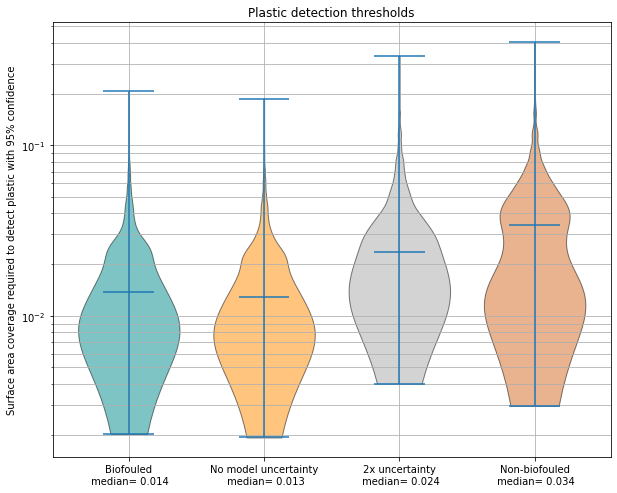

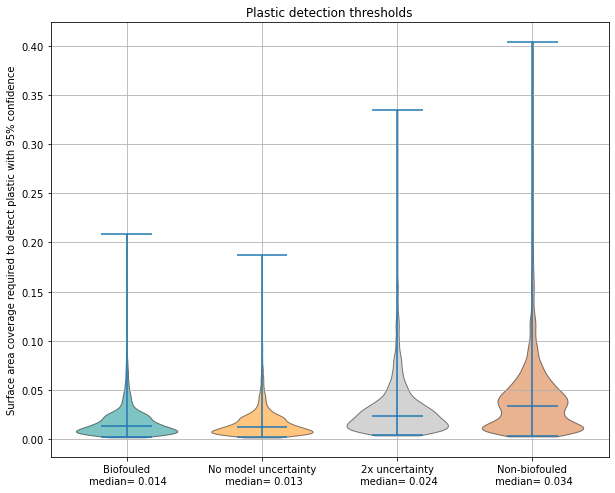

In [5]:
bn=50

dat=[ fdfe_BF['plastic_threshold'],
    fdfe_BF_nomodunc['plastic_threshold'],
    fdfe_BF_x2unc['plastic_threshold'],
    fdfe_NB['plastic_threshold'] ] 

####plot in log space

plt.figure(figsize=[10,8])
plt.grid(True, which="both")
plt.title('Plastic detection thresholds')
plt.ylabel('Surface area coverage required to detect plastic with 95% confidence')

plot_parts=plt.violinplot(dat, points=500,widths=0.75, showmeans=False,
               showextrema=True, showmedians=True)
plt.yscale('log')

for index, pc in enumerate(plot_parts['bodies']):
    pc.set_facecolor(colors[index])
    pc.set_alpha(0.5)
    pc.set_edgecolor('black') 

labels = ["Biofouled", "No model uncertainty", "2x uncertainty", "Non-biofouled"]
meds=np.median(dat,axis=1)
for i in range(len(meds)):
    labels[i]=labels[i]+"\n median="+str(format(meds[i],"6.3f"))
plt.xticks(range(1, 5), labels, rotation=0)


fig_filename = 'figures/SQOOP_histogram_all_log.pdf'
plt.savefig(fig_filename)
plt.show()


####plot in linear space

plt.figure(figsize=[10,8])
plt.grid(True, which="both")
plt.title('Plastic detection thresholds')
plt.ylabel('Surface area coverage required to detect plastic with 95% confidence')

plot_parts=plt.violinplot(dat, points=500,widths=0.75, showmeans=False,
               showextrema=True, showmedians=True)

for index, pc in enumerate(plot_parts['bodies']):
    pc.set_facecolor(colors[index])
    pc.set_alpha(0.5)
    pc.set_edgecolor('black') 

labels = ["Biofouled", "No model uncertainty", "2x uncertainty", "Non-biofouled"]
meds=np.median(dat,axis=1)
for i in range(len(meds)):
    labels[i]=labels[i]+"\n median="+str(format(meds[i],"6.3f"))
plt.xticks(range(1, 5), labels, rotation=0)

fig_filename = 'figures/SQOOP_histogram_all.pdf'
plt.savefig(fig_filename)
plt.show()



In [6]:
fdfe_BF



,Windspeed(m_s),Humidity(%),FMF,AOD(869),chla(mg_m3),plastic_threshold,solz,relaz,senz,plastic_unc_median,SIC_median,plastic_avgK_median,DFS_median,Cor_5_0_median,Cor_5_1_median,Cor_5_2_median,Cor_5_3_median,Cor_5_4_median
0,0.5,30.1,0.01,0.04,0.05,0.032800,15.0,40.0,15.0,0.017720,18.076959,0.998743,3.935159,0.368663,0.000012,5.072313e-05,0.091301,0.053813
1,0.5,30.1,0.01,0.04,0.05,0.008286,15.0,40.0,30.0,0.005482,16.019275,0.999877,3.943192,0.054080,0.000012,2.119501e-03,0.991292,0.034981
2,0.5,30.1,0.01,0.04,0.05,0.006436,15.0,40.0,60.0,0.004429,15.368953,0.999920,3.740470,0.315952,0.000295,1.619147e-02,0.965388,0.004222
3,0.5,30.1,0.01,0.04,0.05,0.006962,15.0,110.0,15.0,0.004728,16.539051,0.999909,3.918407,0.254793,0.002552,6.716603e-07,0.957769,0.000616
4,0.5,30.1,0.01,0.04,0.05,0.007465,15.0,110.0,30.0,0.005029,16.056172,0.999897,3.942273,0.042459,0.005323,4.236488e-04,0.982242,0.014499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13116,10.0,94.9,0.95,0.30,2.00,0.009903,60.0,110.0,15.0,0.006056,10.682394,0.999853,3.089857,0.164667,0.191881,2.027886e-03,0.246482,0.003156
13117,10.0,94.9,0.95,0.30,2.00,0.013288,60.0,110.0,30.0,0.008143,10.350940,0.999735,2.841195,0.084011,0.522909,1.321665e-03,0.513348,0.003579
13118,10.0,94.9,0.95,0.30,2.00,0.020476,60.0,110.0,60.0,0.012173,9.837493,0.999407,3.034574,0.167551,0.100504,1.305256e-03,0.160528,0.010447
13119,10.0,94.9,0.95,0.30,2.00,0.011155,60.0,170.0,15.0,0.006793,10.945819,0.999815,3.271334,0.015961,0.371477,5.262733e-04,0.279809,0.014904


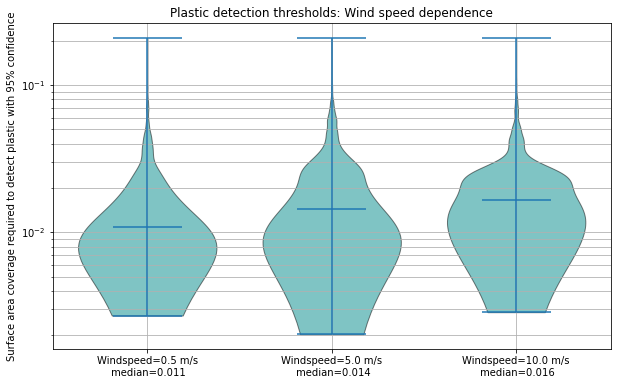

In [19]:

new_A=fdfe_BF.drop(fdfe_BF.loc[fdfe_BF['Windspeed(m_s)']!=0.5].index)
new_A.drop(new_A.tail(1).index,inplace=True) # drop last n rows

new_B=fdfe_BF.drop(fdfe_BF.loc[fdfe_BF['Windspeed(m_s)']!=5.0].index)
new_B.drop(new_B.tail(1).index,inplace=True) # drop last n rows

new_C=fdfe_BF.drop(fdfe_BF.loc[fdfe_BF['Windspeed(m_s)']!=10.0].index)


dat=[ new_A['plastic_threshold'],
    new_B['plastic_threshold'],
    new_C['plastic_threshold'] ] 

####plot in log space

plt.figure(figsize=[10,6])
plt.grid(True, which="both")
plt.title('Plastic detection thresholds: Wind speed dependence')
plt.ylabel('Surface area coverage required to detect plastic with 95% confidence')

plot_parts=plt.violinplot(dat, points=500,widths=0.75, showmeans=False,
               showextrema=True, showmedians=True)
plt.yscale('log')

for index, pc in enumerate(plot_parts['bodies']):
    pc.set_facecolor(colors[0])
    pc.set_alpha(0.5)
    pc.set_edgecolor('black') 

labels = ["Windspeed=0.5 m/s","Windspeed=5.0 m/s","Windspeed=10.0 m/s",]
meds=np.median(dat,axis=1)
for i in range(len(meds)):
    labels[i]=labels[i]+"\n median="+str(format(meds[i],"5.3f"))
plt.xticks(range(1, 4), labels, rotation=0)

fig_filename = 'figures/SQOOP_histogram_ws_log.pdf'
plt.savefig(fig_filename)
plt.show()





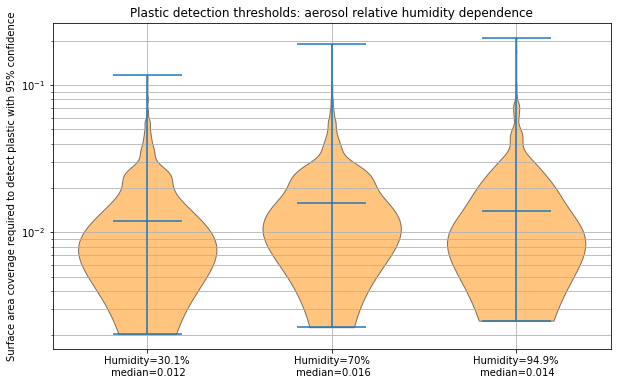

In [20]:

new_A=fdfe_BF.drop(fdfe_BF.loc[fdfe_BF['Humidity(%)']>50].index)
new_A.drop(new_A.tail(1).index,inplace=True) # drop last n rows

new_B=fdfe_BF.drop(fdfe_BF.loc[fdfe_BF['Humidity(%)']!=70].index)
new_B.drop(new_B.tail(1).index,inplace=True) # drop last n rows

new_C=fdfe_BF.drop(fdfe_BF.loc[fdfe_BF['Humidity(%)']<90].index)


dat=[ new_A['plastic_threshold'],
    new_B['plastic_threshold'],
    new_C['plastic_threshold'] ] 

####plot in log space

plt.figure(figsize=[10,6])
plt.grid(True, which="both")
plt.title('Plastic detection thresholds: aerosol relative humidity dependence')
plt.ylabel('Surface area coverage required to detect plastic with 95% confidence')

plot_parts=plt.violinplot(dat, points=500,widths=0.75, showmeans=False,
               showextrema=True, showmedians=True)
plt.yscale('log')

for index, pc in enumerate(plot_parts['bodies']):
    pc.set_facecolor(colors[1])
    pc.set_alpha(0.5)
    pc.set_edgecolor('black') 

labels = ["Humidity=30.1%","Humidity=70%","Humidity=94.9%",]
meds=np.median(dat,axis=1)
for i in range(len(meds)):
    labels[i]=labels[i]+"\n median="+str(format(meds[i],"5.3f"))
plt.xticks(range(1, 4), labels, rotation=0)

fig_filename = 'figures/SQOOP_histogram_humidity_log.pdf'
plt.savefig(fig_filename)
plt.show()





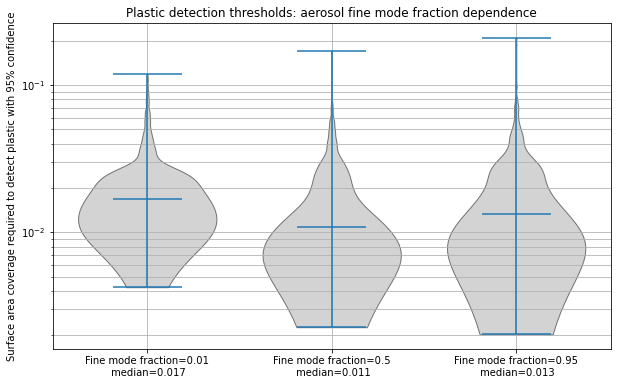

In [21]:

new_A=fdfe_BF.drop(fdfe_BF.loc[fdfe_BF['FMF']!=0.01].index)
new_A.drop(new_A.tail(1).index,inplace=True) # drop last n rows

new_B=fdfe_BF.drop(fdfe_BF.loc[fdfe_BF['FMF']!=0.5].index)
new_B.drop(new_B.tail(1).index,inplace=True) # drop last n rows

new_C=fdfe_BF.drop(fdfe_BF.loc[fdfe_BF['FMF']!=0.95].index)


dat=[ new_A['plastic_threshold'],
    new_B['plastic_threshold'],
    new_C['plastic_threshold'] ] 

####plot in log space

plt.figure(figsize=[10,6])
plt.grid(True, which="both")
plt.title('Plastic detection thresholds: aerosol fine mode fraction dependence')
plt.ylabel('Surface area coverage required to detect plastic with 95% confidence')

plot_parts=plt.violinplot(dat, points=500,widths=0.75, showmeans=False,
               showextrema=True, showmedians=True)
plt.yscale('log')

for index, pc in enumerate(plot_parts['bodies']):
    pc.set_facecolor(colors[2])
    pc.set_alpha(0.5)
    pc.set_edgecolor('black') 

labels = ["Fine mode fraction=0.01","Fine mode fraction=0.5","Fine mode fraction=0.95",]
meds=np.median(dat,axis=1)
for i in range(len(meds)):
    labels[i]=labels[i]+"\n median="+str(format(meds[i],"5.3f"))
plt.xticks(range(1, 4), labels, rotation=0)

fig_filename = 'figures/SQOOP_histogram_fmf_log.pdf'
plt.savefig(fig_filename)
plt.show()





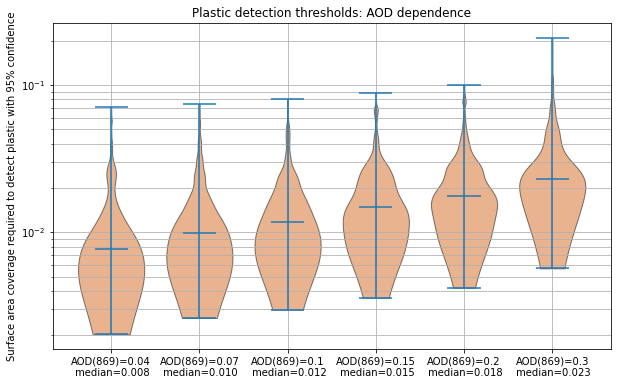

In [22]:

new_A=fdfe_BF.drop(fdfe_BF.loc[fdfe_BF['AOD(869)']!=0.04].index)
new_A.drop(new_A.tail(1).index,inplace=True) # drop last n rows

new_B=fdfe_BF.drop(fdfe_BF.loc[fdfe_BF['AOD(869)']!=0.07].index)
new_B.drop(new_B.tail(1).index,inplace=True) # drop last n rows

new_C=fdfe_BF.drop(fdfe_BF.loc[fdfe_BF['AOD(869)']!=0.1].index)
new_C.drop(new_C.tail(1).index,inplace=True) # drop last n rows

new_D=fdfe_BF.drop(fdfe_BF.loc[fdfe_BF['AOD(869)']!=0.15].index)
new_D.drop(new_D.tail(1).index,inplace=True) # drop last n rows

new_E=fdfe_BF.drop(fdfe_BF.loc[fdfe_BF['AOD(869)']!=0.2].index)
new_E.drop(new_E.tail(1).index,inplace=True) # drop last n rows

new_F=fdfe_BF.drop(fdfe_BF.loc[fdfe_BF['AOD(869)']!=0.3].index)

dat=[ new_A['plastic_threshold'],
    new_B['plastic_threshold'],
    new_C['plastic_threshold'],
    new_D['plastic_threshold'],
    new_E['plastic_threshold'],
    new_F['plastic_threshold'] ] 

####plot in log space

plt.figure(figsize=[10,6])
plt.grid(True, which="both")
plt.title('Plastic detection thresholds: AOD dependence')
plt.ylabel('Surface area coverage required to detect plastic with 95% confidence')

plot_parts=plt.violinplot(dat, points=500,widths=0.75, showmeans=False,
               showextrema=True, showmedians=True)
plt.yscale('log')

for index, pc in enumerate(plot_parts['bodies']):
    pc.set_facecolor(colors[3])
    pc.set_alpha(0.5)
    pc.set_edgecolor('black') 

labels = ["AOD(869)=0.04","AOD(869)=0.07","AOD(869)=0.1","AOD(869)=0.15","AOD(869)=0.2","AOD(869)=0.3",]
meds=np.median(dat,axis=1)
for i in range(len(meds)):
    labels[i]=labels[i]+"\n median="+str(format(meds[i],"5.3f"))
plt.xticks(range(1, 7), labels, rotation=0)

fig_filename = 'figures/SQOOP_histogram_aod_log.pdf'
plt.savefig(fig_filename)
plt.show()





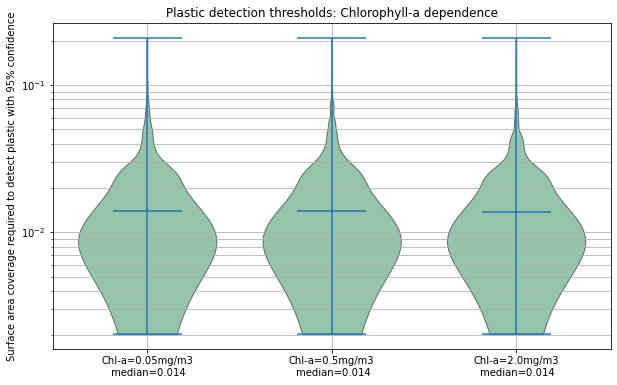

In [18]:

new_A=fdfe_BF.drop(fdfe_BF.loc[fdfe_BF['chla(mg_m3)']!=0.05].index)
new_A.drop(new_A.tail(1).index,inplace=True) # drop last n rows

new_B=fdfe_BF.drop(fdfe_BF.loc[fdfe_BF['chla(mg_m3)']!=0.5].index)
new_B.drop(new_B.tail(1).index,inplace=True) # drop last n rows

new_C=fdfe_BF.drop(fdfe_BF.loc[fdfe_BF['chla(mg_m3)']!=2.0].index)


dat=[ new_A['plastic_threshold'],
    new_B['plastic_threshold'],
    new_C['plastic_threshold'] ] 

####plot in log space

plt.figure(figsize=[10,6])
plt.grid(True, which="both")
plt.title('Plastic detection thresholds: Chlorophyll-a dependence')
plt.ylabel('Surface area coverage required to detect plastic with 95% confidence')

plot_parts=plt.violinplot(dat, points=500,widths=0.75, showmeans=False,
               showextrema=True, showmedians=True)
plt.yscale('log')

for index, pc in enumerate(plot_parts['bodies']):
    pc.set_facecolor(colors[4])
    pc.set_alpha(0.5)
    pc.set_edgecolor('black') 

labels = ["Chl-a=0.05mg/m3","Chl-a=0.5mg/m3","Chl-a=2.0mg/m3",]
meds=np.median(dat,axis=1)
for i in range(len(meds)):
    labels[i]=labels[i]+"\n median="+str(format(meds[i],"5.3f"))
plt.xticks(range(1, 4), labels, rotation=0)

fig_filename = 'figures/SQOOP_histogram_chla_log.pdf'
plt.savefig(fig_filename)
plt.show()


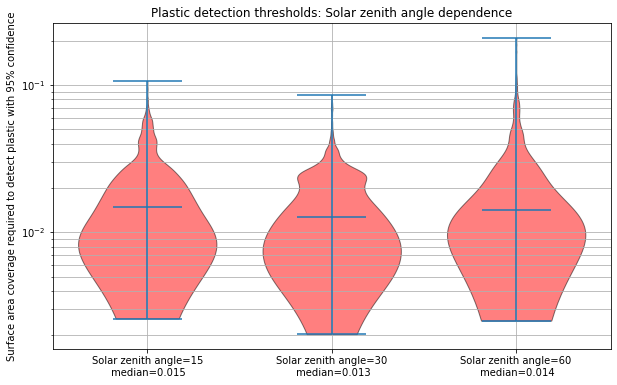

In [24]:

new_A=fdfe_BF.drop(fdfe_BF.loc[fdfe_BF['solz']!=15].index)
new_A.drop(new_A.tail(1).index,inplace=True) # drop last n rows

new_B=fdfe_BF.drop(fdfe_BF.loc[fdfe_BF['solz']!=30].index)
new_B.drop(new_B.tail(1).index,inplace=True) # drop last n rows

new_C=fdfe_BF.drop(fdfe_BF.loc[fdfe_BF['solz']!=60].index)


dat=[ new_A['plastic_threshold'],
    new_B['plastic_threshold'],
    new_C['plastic_threshold'] ] 

####plot in log space

plt.figure(figsize=[10,6])
plt.grid(True, which="both")
plt.title('Plastic detection thresholds: Solar zenith angle dependence')
plt.ylabel('Surface area coverage required to detect plastic with 95% confidence')

plot_parts=plt.violinplot(dat, points=500,widths=0.75, showmeans=False,
               showextrema=True, showmedians=True)
plt.yscale('log')

for index, pc in enumerate(plot_parts['bodies']):
    pc.set_facecolor(colors[8])
    pc.set_alpha(0.5)
    pc.set_edgecolor('black') 

labels = ["Solar zenith angle=15","Solar zenith angle=30","Solar zenith angle=60"]
meds=np.median(dat,axis=1)
for i in range(len(meds)):
    labels[i]=labels[i]+"\n median="+str(format(meds[i],"5.3f"))
plt.xticks(range(1, 4), labels, rotation=0)

fig_filename = 'figures/SQOOP_histogram_sza_log.pdf'
plt.savefig(fig_filename)
plt.show()